In [1]:
import numpy as np
import pandas as pd 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,  recall_score, roc_auc_score, roc_curve,  precision_recall_curve, f1_score, auc
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("parkinsons.csv")

In [3]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
data.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [7]:
rows, cols = data.shape
print("The dataset contains",rows,"rows and",cols,"columns" )

The dataset contains 195 rows and 24 columns


In [8]:
data.size


4680

In [9]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.nunique()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

In [12]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)


name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [13]:
# Dropping The Name Column
data.drop(['name'], axis=1, inplace=True)

In [14]:
data['status'] = data['status'].astype('uint8')

<Axes: xlabel='status', ylabel='count'>

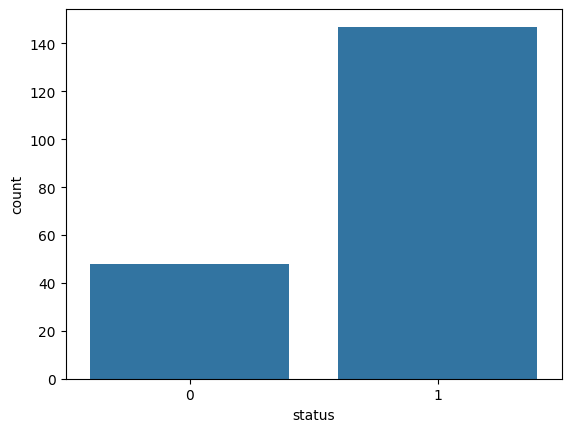

In [15]:
#Balance of Data
sns.countplot(x='status',data=data)

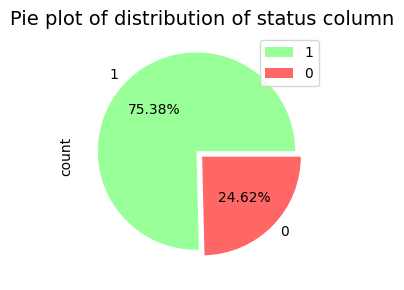

In [16]:
explode=(0.08,0)

data['status'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(3,3),explode=explode,colors=['#99ff99','#ff6666'])
plt.title("Pie plot of distribution of status column", fontsize=14)
plt.tight_layout()
plt.legend()
plt.show()

In [17]:
# From the boxplot shown above it is very evident that
# if a patient has a lower rate of 'HNR','MDVP:Flo(Hz)','MDVP:Fhi(Hz)','MDVP:Fo(Hz)' ,then
# he/she is affected by parkinsons disease.

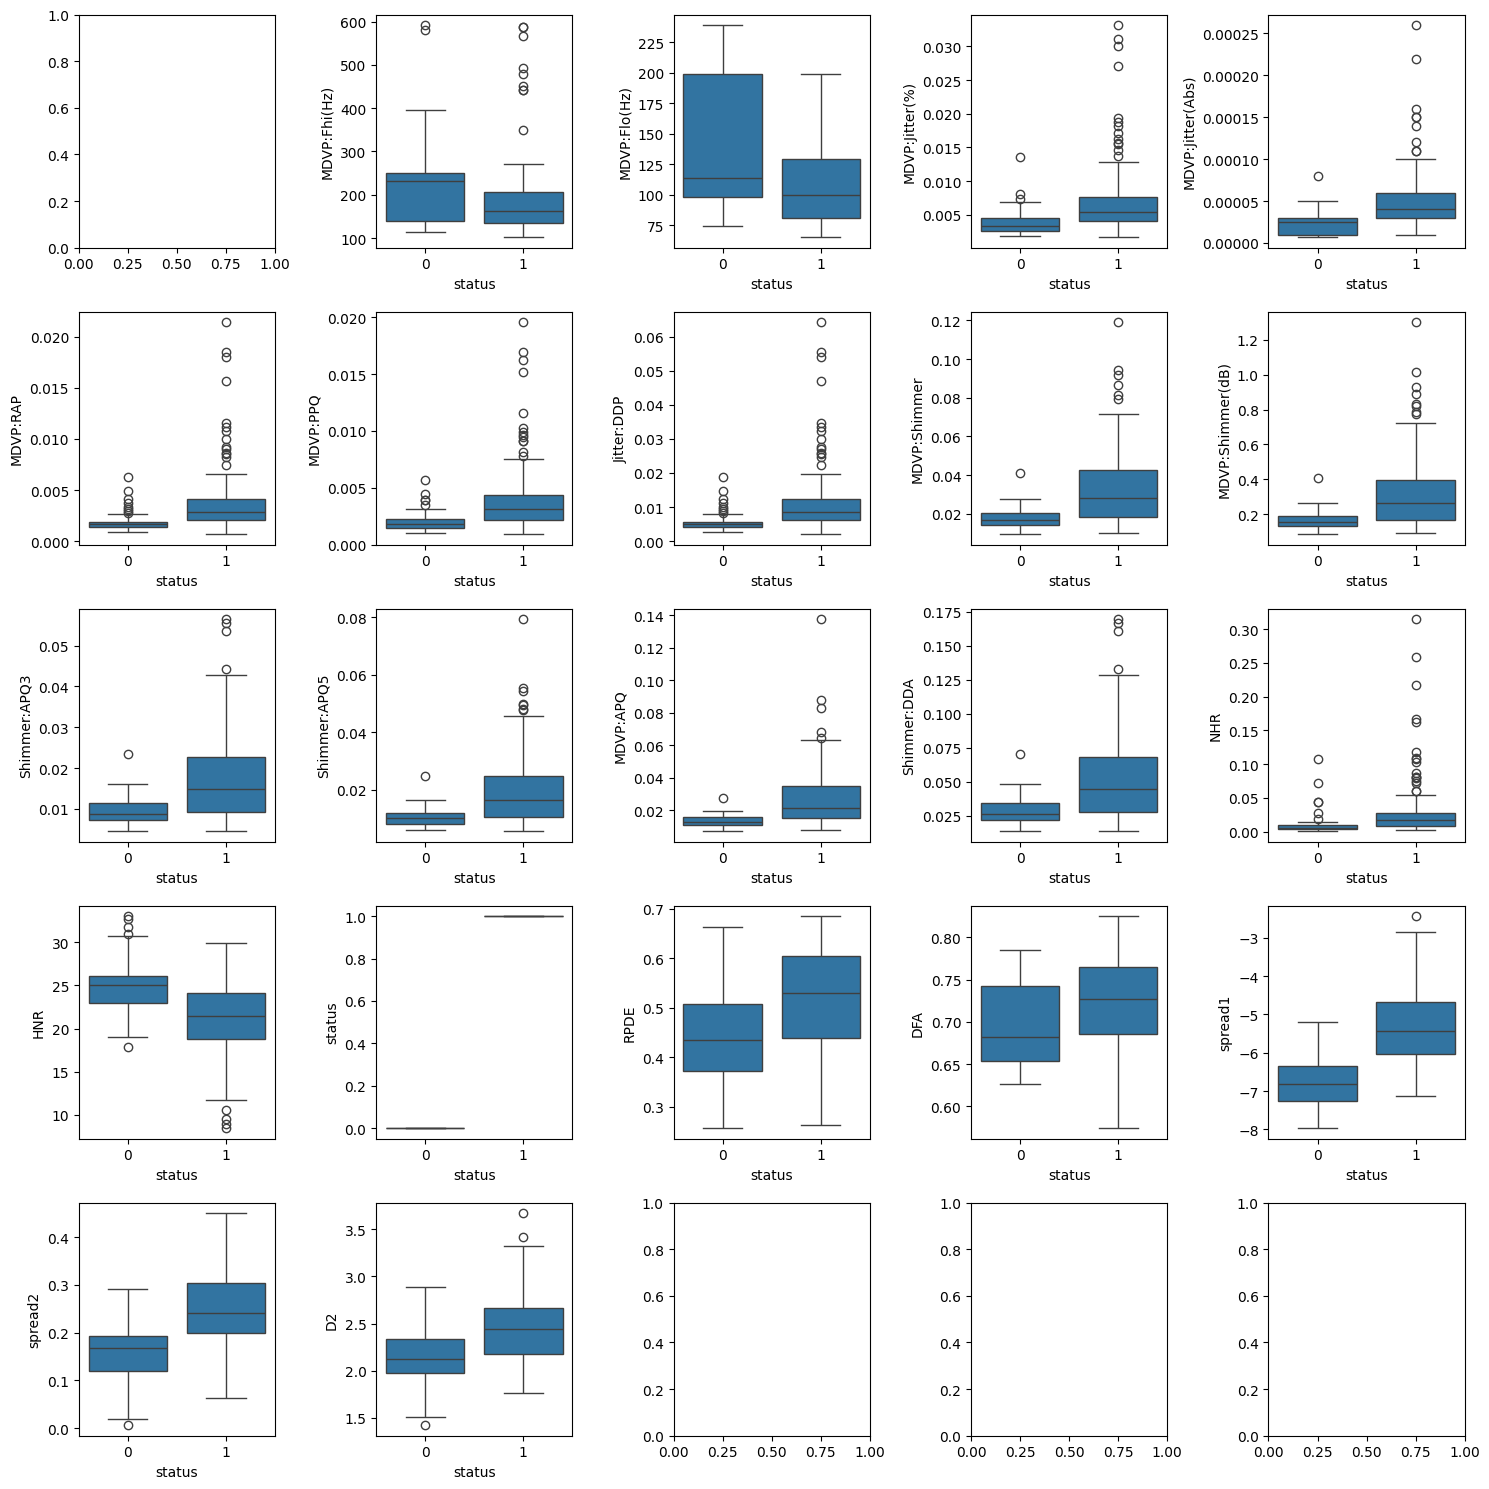

In [18]:
#Box Plot
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(data.columns)-1):
    sns.boxplot(x='status',y=data.iloc[:,i],data=data,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()

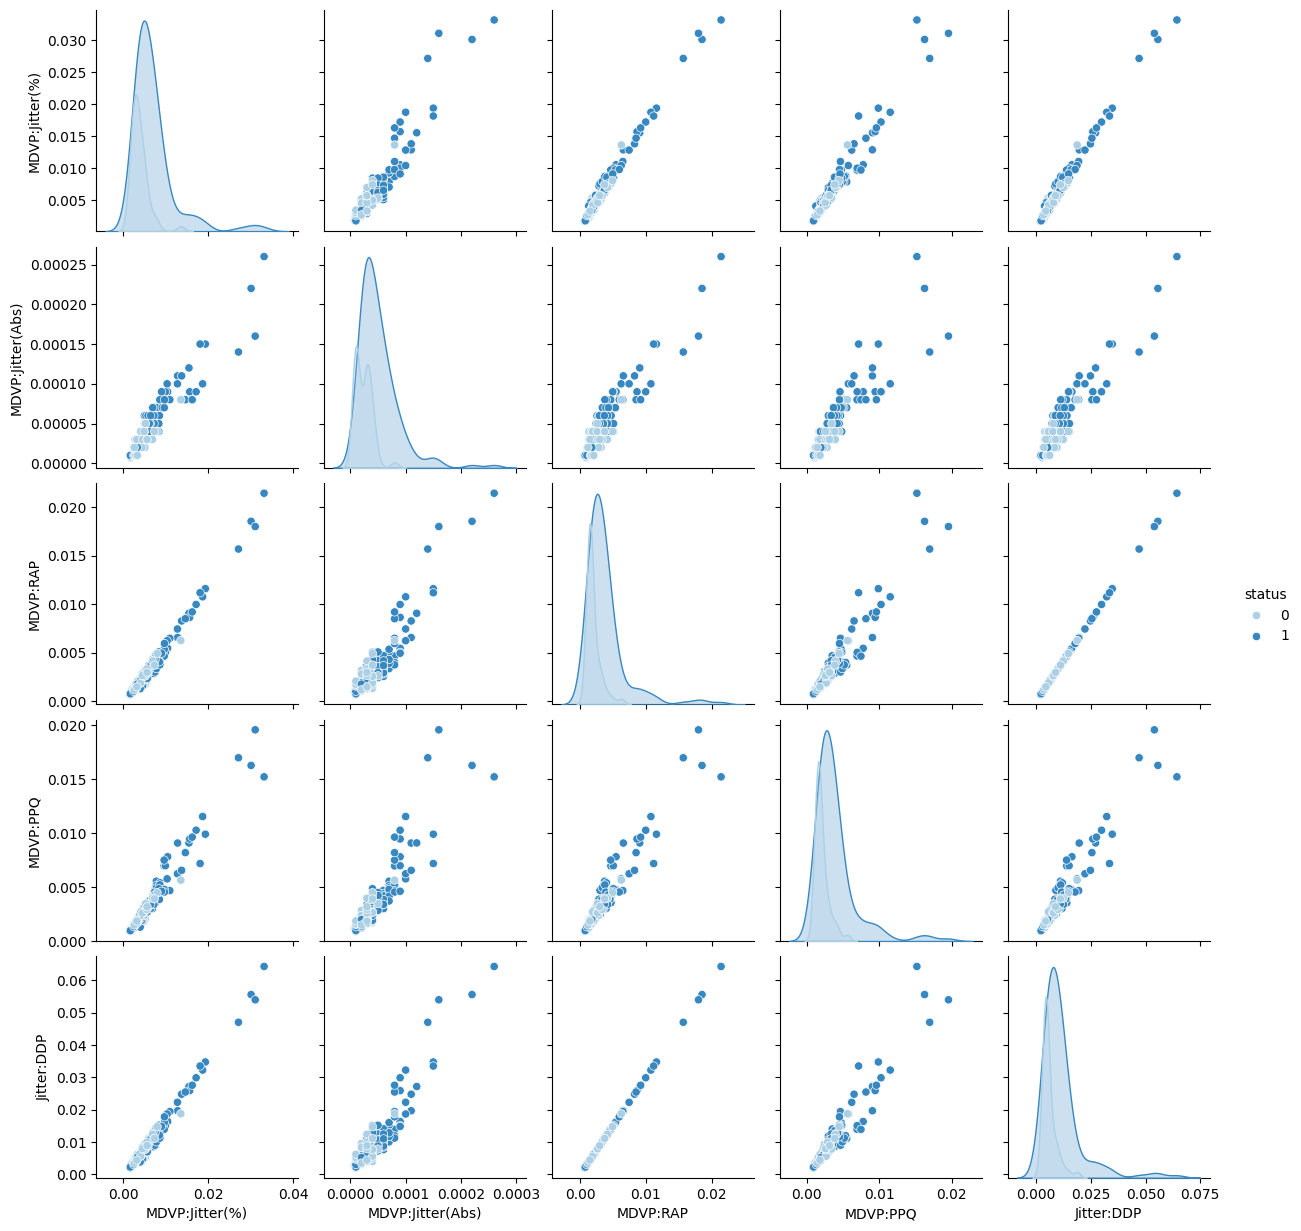

In [19]:
# pair plot we can understand that all these fundamental frequencies are highly correlated with eachother.
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(data,hue = 'status', vars = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ', 'Jitter:DDP'], palette='Blues' )
plt.show()

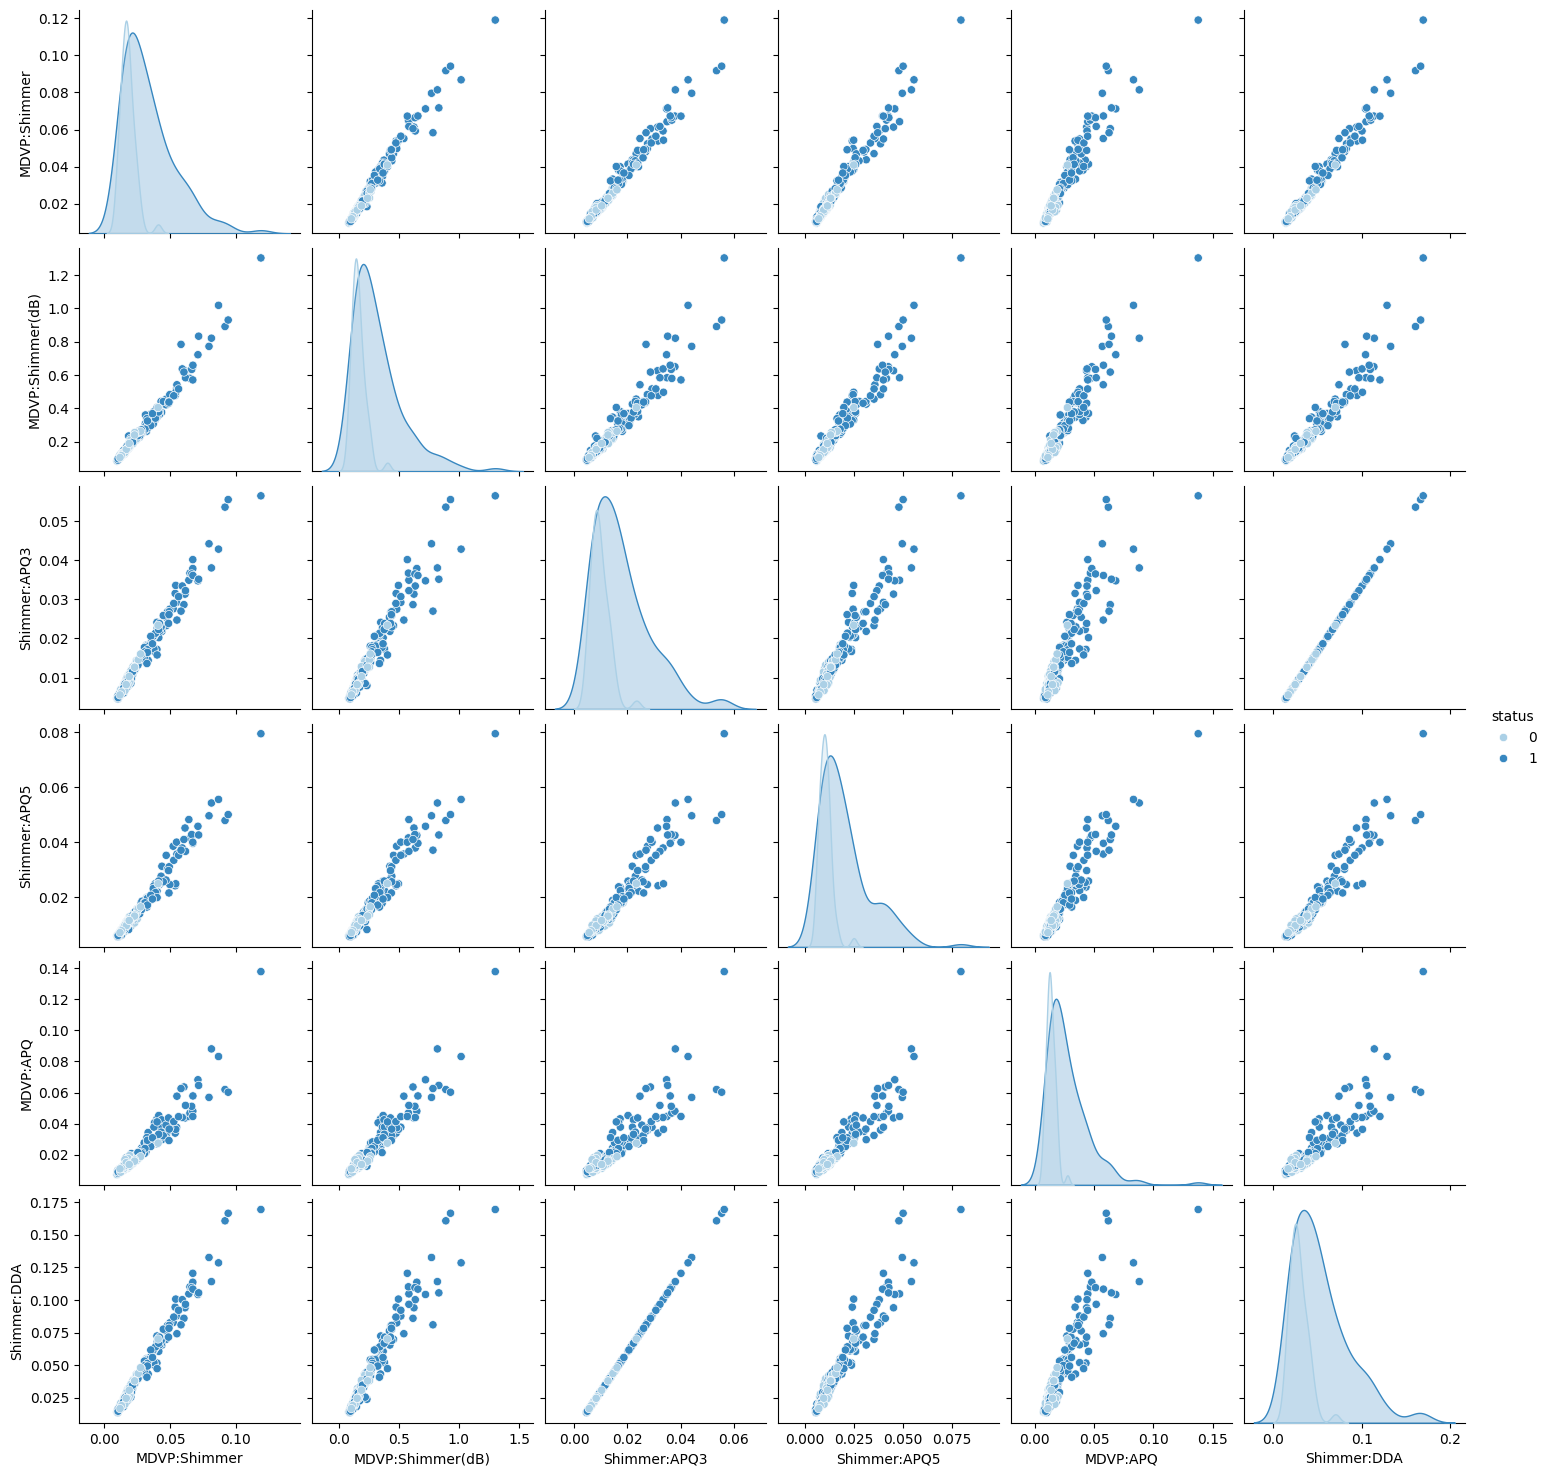

In [20]:
# pair plot we can understand that all these measures variation in amplitude are highly correlated with eachother.
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(data,hue = 'status', vars = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'], palette='Blues' )
plt.show()

In [21]:
# Shuffling the data
data = data.sample(frac=1, random_state=42).copy()

In [22]:
# Splitting the data
X = data.drop(["status"], axis=1) 
y = data["status"]

<Axes: >

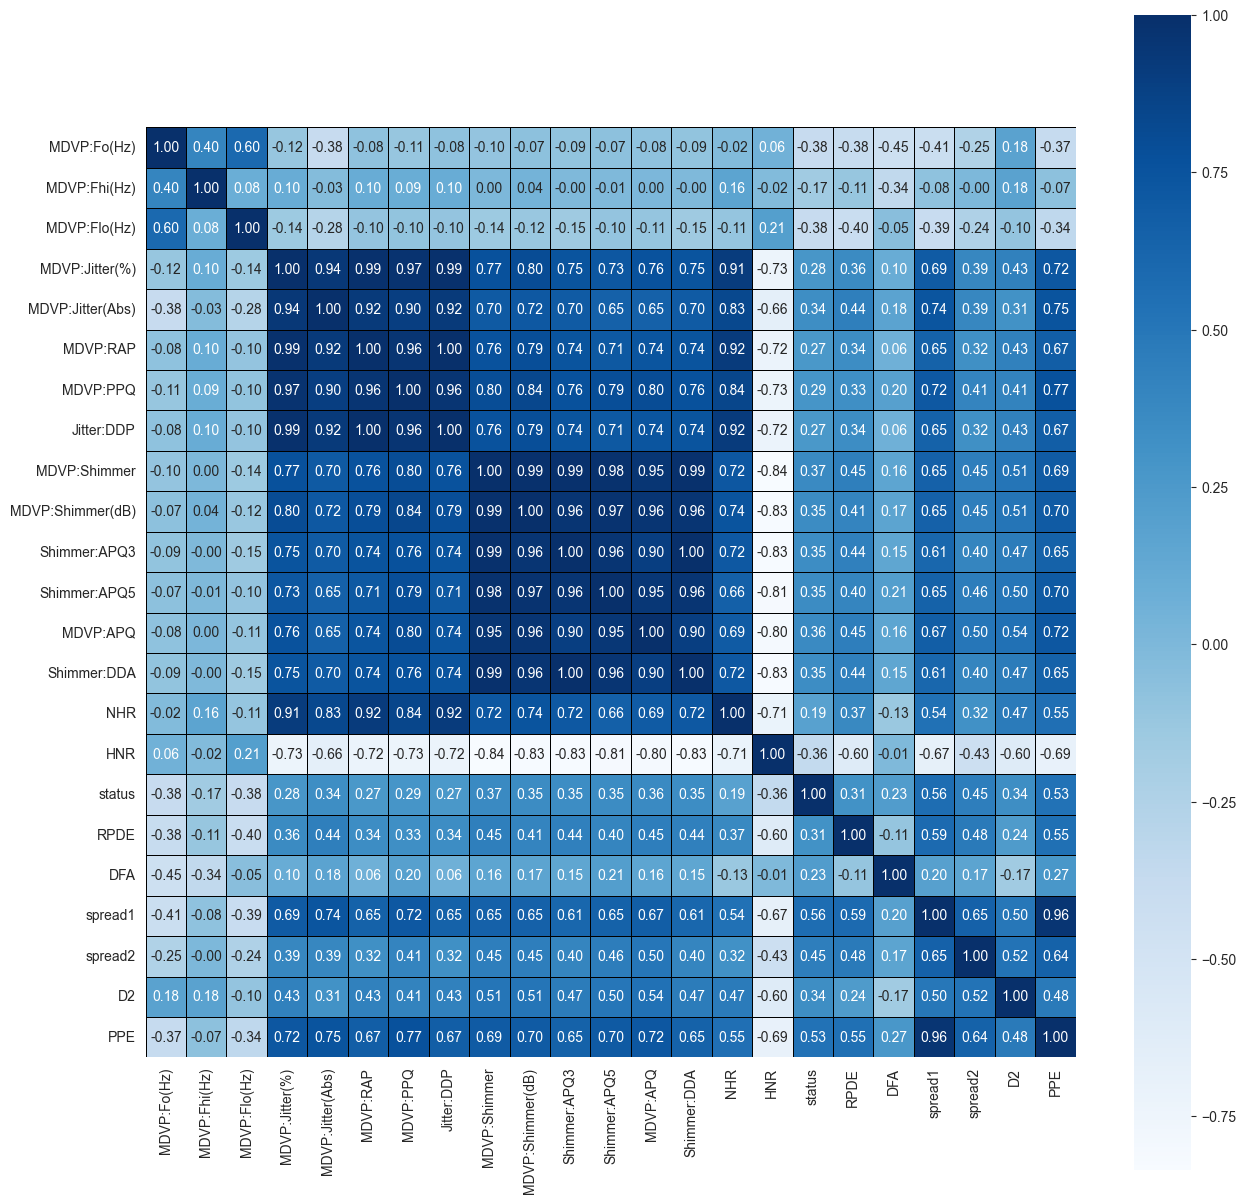

In [23]:
#In this correlation heatmap, we can see that many independent features are highly correlated with eachother.
corr_map=data.corr()
sns.set_style('darkgrid') 
# sns.set_style help to set color of the axes, whether a grid is enabled by default, and other aesthetic elements.
plt.figure(figsize=(15,15))
sns.heatmap(corr_map, annot=True, fmt='.2f', cmap='Blues', cbar=True, square=True, linewidths=0.5, linecolor='black')

In [24]:
correlation_values=data.corr()['status']
correlation_values.abs().sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

In [25]:

# Split dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=51)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=51)

In [26]:
# Setting the train data for data preprocessing
data = X_train.copy()

In [27]:
data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
104,154.003,160.267,128.621,0.00183,0.00001,0.00076,0.00100,0.00229,0.01030,0.094,...,0.00871,0.01406,0.00243,28.409,0.263654,0.691483,-7.111576,0.144780,2.065477,0.093193
194,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,...,0.01373,0.03078,0.04398,21.209,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569
159,127.930,138.752,112.173,0.00605,0.00005,0.00321,0.00318,0.00962,0.03235,0.339,...,0.03105,0.04079,0.02663,19.651,0.654945,0.675865,-5.498456,0.234196,2.103014,0.216638
179,148.143,155.982,135.041,0.00392,0.00003,0.00204,0.00231,0.00612,0.01450,0.131,...,0.01263,0.02175,0.00540,23.683,0.398499,0.778349,-5.711205,0.240875,2.845109,0.192730
188,114.563,119.167,86.647,0.00327,0.00003,0.00146,0.00184,0.00439,0.01185,0.106,...,0.01095,0.01672,0.00703,24.775,0.555303,0.659132,-6.710219,0.149694,1.913990,0.121777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,145.174,198.109,80.637,0.00733,0.00005,0.00414,0.00422,0.01242,0.02362,0.233,...,0.01944,0.03706,0.01874,18.857,0.637518,0.735546,-5.594275,0.127950,1.765957,0.222716
103,150.258,154.609,75.349,0.00248,0.00002,0.00105,0.00136,0.00315,0.01131,0.107,...,0.01009,0.01567,0.00495,26.759,0.296888,0.722356,-6.878393,0.089267,2.004055,0.113942
13,139.173,179.139,76.556,0.00390,0.00003,0.00165,0.00208,0.00496,0.01642,0.154,...,0.01797,0.02184,0.01041,24.889,0.430166,0.665833,-5.660217,0.254989,2.519422,0.199889
69,148.090,162.824,67.343,0.00762,0.00005,0.00467,0.00354,0.01400,0.05428,0.497,...,0.03635,0.10070,0.02431,21.718,0.487407,0.727313,-6.261141,0.120956,2.137075,0.141958


In [28]:
X_train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
104,154.003,160.267,128.621,0.00183,0.00001,0.00076,0.00100,0.00229,0.01030,0.094,...,0.00871,0.01406,0.00243,28.409,0.263654,0.691483,-7.111576,0.144780,2.065477,0.093193
194,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,...,0.01373,0.03078,0.04398,21.209,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569
159,127.930,138.752,112.173,0.00605,0.00005,0.00321,0.00318,0.00962,0.03235,0.339,...,0.03105,0.04079,0.02663,19.651,0.654945,0.675865,-5.498456,0.234196,2.103014,0.216638
179,148.143,155.982,135.041,0.00392,0.00003,0.00204,0.00231,0.00612,0.01450,0.131,...,0.01263,0.02175,0.00540,23.683,0.398499,0.778349,-5.711205,0.240875,2.845109,0.192730
188,114.563,119.167,86.647,0.00327,0.00003,0.00146,0.00184,0.00439,0.01185,0.106,...,0.01095,0.01672,0.00703,24.775,0.555303,0.659132,-6.710219,0.149694,1.913990,0.121777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,145.174,198.109,80.637,0.00733,0.00005,0.00414,0.00422,0.01242,0.02362,0.233,...,0.01944,0.03706,0.01874,18.857,0.637518,0.735546,-5.594275,0.127950,1.765957,0.222716
103,150.258,154.609,75.349,0.00248,0.00002,0.00105,0.00136,0.00315,0.01131,0.107,...,0.01009,0.01567,0.00495,26.759,0.296888,0.722356,-6.878393,0.089267,2.004055,0.113942
13,139.173,179.139,76.556,0.00390,0.00003,0.00165,0.00208,0.00496,0.01642,0.154,...,0.01797,0.02184,0.01041,24.889,0.430166,0.665833,-5.660217,0.254989,2.519422,0.199889
69,148.090,162.824,67.343,0.00762,0.00005,0.00467,0.00354,0.01400,0.05428,0.497,...,0.03635,0.10070,0.02431,21.718,0.487407,0.727313,-6.261141,0.120956,2.137075,0.141958


In [29]:
y_train

104    1
194    0
159    1
179    1
188    0
      ..
125    1
103    1
13     1
69     1
51     0
Name: status, Length: 136, dtype: uint8

In [30]:
data.iloc[0]

MDVP:Fo(Hz)         154.003000
MDVP:Fhi(Hz)        160.267000
MDVP:Flo(Hz)        128.621000
MDVP:Jitter(%)        0.001830
MDVP:Jitter(Abs)      0.000010
MDVP:RAP              0.000760
MDVP:PPQ              0.001000
Jitter:DDP            0.002290
MDVP:Shimmer          0.010300
MDVP:Shimmer(dB)      0.094000
Shimmer:APQ3          0.004690
Shimmer:APQ5          0.005820
MDVP:APQ              0.008710
Shimmer:DDA           0.014060
NHR                   0.002430
HNR                  28.409000
RPDE                  0.263654
DFA                   0.691483
spread1              -7.111576
spread2               0.144780
D2                    2.065477
PPE                   0.093193
Name: 104, dtype: float64

In [31]:
data.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [32]:
# Extracting features
features = [feature for feature in data.columns]

In [33]:
print(X.isnull().sum())
print(np.isinf(X).sum())


MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [34]:
# missing values
data.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [35]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,...,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,151.931390,200.604684,114.589846,0.006216,0.000045,0.003284,0.003461,0.009852,0.028677,0.273382,...,0.023195,0.045209,0.025439,22.092140,0.495700,0.718214,-5.700402,0.222461,2.361162,0.205179
std,39.920188,99.981771,42.410840,0.004894,0.000036,0.003020,0.002747,0.009059,0.017756,0.181416,...,0.014798,0.029362,0.042867,4.609002,0.107569,0.056349,1.118238,0.080875,0.397435,0.092877
min,88.333000,102.145000,65.782000,0.001680,0.000009,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.867000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,116.680500,133.025000,83.805750,0.003318,0.000020,0.001650,0.001820,0.004960,0.016428,0.147250,...,0.012660,0.023867,0.005760,19.343250,0.415369,0.673498,-6.560367,0.170862,2.051134,0.131435
50%,148.116500,170.886500,104.376000,0.004945,0.000035,0.002520,0.002750,0.007560,0.022930,0.218500,...,0.017645,0.037590,0.011750,22.449500,0.488647,0.722305,-5.756374,0.219235,2.343298,0.193324
75%,178.641500,227.381500,130.213250,0.007285,0.000060,0.003765,0.003965,0.011303,0.037610,0.348500,...,0.028897,0.054352,0.025540,25.385500,0.591810,0.761623,-4.901151,0.267829,2.635544,0.253842
max,244.990000,592.030000,239.170000,0.033160,0.000260,0.021440,0.016990,0.064330,0.094190,1.018000,...,0.083180,0.166540,0.314820,33.047000,0.671299,0.825288,-2.839756,0.434326,3.671155,0.454721


In [36]:
# statistics for numerical columns
Descriptive_statistics = data.describe()
print(Descriptive_statistics)

       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   136.000000    136.000000    136.000000      136.000000   
mean    151.931390    200.604684    114.589846        0.006216   
std      39.920188     99.981771     42.410840        0.004894   
min      88.333000    102.145000     65.782000        0.001680   
25%     116.680500    133.025000     83.805750        0.003318   
50%     148.116500    170.886500    104.376000        0.004945   
75%     178.641500    227.381500    130.213250        0.007285   
max     244.990000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        136.000000  136.000000  136.000000  136.000000    136.000000   
mean           0.000045    0.003284    0.003461    0.009852      0.028677   
std            0.000036    0.003020    0.002747    0.009059      0.017756   
min            0.000009    0.000680    0.000920    0.002040      0.009540   
25%            0.000

In [37]:
NHR_counts = data['NHR'].value_counts()
print(NHR_counts)

NHR
0.07223    2
0.00479    2
0.00340    2
0.00420    2
0.00540    1
          ..
0.01874    1
0.00495    1
0.01041    1
0.02431    1
0.00474    1
Name: count, Length: 132, dtype: int64


In [38]:
HNR_counts = data['HNR'].value_counts()
print(HNR_counts)

HNR
28.409    1
21.209    1
19.651    1
23.683    1
24.775    1
         ..
18.857    1
26.759    1
24.889    1
21.718    1
25.030    1
Name: count, Length: 136, dtype: int64


In [39]:
RPDE_counts = data['RPDE'].value_counts()
print(RPDE_counts)

RPDE
0.263654    1
0.462803    1
0.654945    1
0.398499    1
0.555303    1
           ..
0.637518    1
0.296888    1
0.430166    1
0.487407    1
0.507504    1
Name: count, Length: 136, dtype: int64


In [40]:
DFA_counts = data['DFA'].value_counts()
print(DFA_counts)

DFA
0.691483    1
0.664357    1
0.675865    1
0.778349    1
0.659132    1
           ..
0.735546    1
0.722356    1
0.665833    1
0.727313    1
0.760361    1
Name: count, Length: 136, dtype: int64


In [41]:
# initialize and scale values
scaler = StandardScaler()
scaler.fit(data[features])
data[features] = scaler.transform(data[features])

In [42]:
#  Ratio of No Parkinson to Parkinson
y_train.value_counts(normalize=True)

status
1    0.720588
0    0.279412
Name: proportion, dtype: float64

In [43]:
# data together
data = pd.concat([data, y_train], axis=1)

In [44]:
data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
104,0.052086,-0.404942,0.332062,-0.899562,-0.957779,-0.838798,-0.899415,-0.837795,-1.038812,-0.992445,...,-1.064757,-0.538752,1.375615,-2.165157,-0.476140,-1.266628,-0.964059,-0.746736,-1.210209,1
194,1.567832,0.599038,-0.866576,-0.111989,-0.405371,-0.110883,-0.106503,-0.110982,-0.556062,-0.461318,...,-0.493215,0.434114,-0.192320,-0.306957,-0.959309,-0.021231,-0.394580,0.490730,-0.611773,0
159,-0.603457,-0.620927,-0.057197,-0.034052,0.147038,-0.024464,-0.102849,-0.025670,0.207633,0.363034,...,-0.151042,0.027875,-0.531604,1.485864,-0.754328,0.181261,0.145636,-0.651938,0.123833,1
179,-0.095250,-0.447958,0.483998,-0.470909,-0.405371,-0.413350,-0.420745,-0.413451,-0.801394,-0.787740,...,-0.801888,-0.469211,0.346440,-0.906958,1.071118,-0.009697,0.228526,1.222178,-0.134535,1
188,-0.939538,-0.817537,-0.661297,-0.604222,-0.405371,-0.606131,-0.592481,-0.605126,-0.951194,-0.926054,...,-0.973829,-0.431046,0.584243,0.556134,-1.052377,-0.906382,-0.903074,-1.129307,-0.901308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,-0.169898,-0.025054,-0.803530,0.228472,0.147038,0.284650,0.277165,0.284555,-0.285858,-0.223418,...,-0.278545,-0.156864,-0.704513,1.323257,0.308710,0.095256,-1.172928,-1.503155,0.189517,1
103,-0.042073,-0.461741,-0.928676,-0.766249,-0.681575,-0.742407,-0.767872,-0.742511,-0.981719,-0.920522,...,-1.009722,-0.479748,1.016297,-1.855060,0.073770,-1.057330,-1.653002,-0.901853,-0.985979,1
13,-0.320779,-0.215490,-0.900111,-0.475011,-0.405371,-0.542979,-0.504786,-0.541973,-0.692860,-0.660491,...,-0.798812,-0.351905,0.609069,-0.611483,-0.933019,0.036069,0.403687,0.399675,-0.057169,1
69,-0.096582,-0.379273,-1.118146,0.287950,0.147038,0.460812,0.028694,0.459610,1.447294,1.237180,...,1.896869,-0.026446,-0.081476,-0.077384,0.162064,-0.503303,-1.259726,-0.565919,-0.683217,1


In [45]:
data.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'status'],
      dtype='object')

In [46]:
# Balance
smote = SMOTE(random_state=51)
X = data.drop("status", axis=1) 
y = data["status"]
X_train, y_train = smote.fit_resample(X, y)

In [47]:
data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
104,0.052086,-0.404942,0.332062,-0.899562,-0.957779,-0.838798,-0.899415,-0.837795,-1.038812,-0.992445,...,-1.064757,-0.538752,1.375615,-2.165157,-0.476140,-1.266628,-0.964059,-0.746736,-1.210209,1
194,1.567832,0.599038,-0.866576,-0.111989,-0.405371,-0.110883,-0.106503,-0.110982,-0.556062,-0.461318,...,-0.493215,0.434114,-0.192320,-0.306957,-0.959309,-0.021231,-0.394580,0.490730,-0.611773,0
159,-0.603457,-0.620927,-0.057197,-0.034052,0.147038,-0.024464,-0.102849,-0.025670,0.207633,0.363034,...,-0.151042,0.027875,-0.531604,1.485864,-0.754328,0.181261,0.145636,-0.651938,0.123833,1
179,-0.095250,-0.447958,0.483998,-0.470909,-0.405371,-0.413350,-0.420745,-0.413451,-0.801394,-0.787740,...,-0.801888,-0.469211,0.346440,-0.906958,1.071118,-0.009697,0.228526,1.222178,-0.134535,1
188,-0.939538,-0.817537,-0.661297,-0.604222,-0.405371,-0.606131,-0.592481,-0.605126,-0.951194,-0.926054,...,-0.973829,-0.431046,0.584243,0.556134,-1.052377,-0.906382,-0.903074,-1.129307,-0.901308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,-0.169898,-0.025054,-0.803530,0.228472,0.147038,0.284650,0.277165,0.284555,-0.285858,-0.223418,...,-0.278545,-0.156864,-0.704513,1.323257,0.308710,0.095256,-1.172928,-1.503155,0.189517,1
103,-0.042073,-0.461741,-0.928676,-0.766249,-0.681575,-0.742407,-0.767872,-0.742511,-0.981719,-0.920522,...,-1.009722,-0.479748,1.016297,-1.855060,0.073770,-1.057330,-1.653002,-0.901853,-0.985979,1
13,-0.320779,-0.215490,-0.900111,-0.475011,-0.405371,-0.542979,-0.504786,-0.541973,-0.692860,-0.660491,...,-0.798812,-0.351905,0.609069,-0.611483,-0.933019,0.036069,0.403687,0.399675,-0.057169,1
69,-0.096582,-0.379273,-1.118146,0.287950,0.147038,0.460812,0.028694,0.459610,1.447294,1.237180,...,1.896869,-0.026446,-0.081476,-0.077384,0.162064,-0.503303,-1.259726,-0.565919,-0.683217,1


In [48]:
#  Ratio of No Diabetes to Diabetes
y_train.value_counts(normalize=True)

status
1    0.5
0    0.5
Name: proportion, dtype: float64

In [49]:
X_test[features] = scaler.transform(X_test[features]) # scaling features

In [50]:
X_test[features]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
38,0.710696,0.006468,1.440461,-0.692414,-0.681575,-0.582864,-0.658253,-0.582967,-0.804786,-0.787740,...,-0.766103,-0.801205,-0.541562,1.011724,-0.856712,0.854880,-0.674664,-0.126178,-0.231745,-0.683530
178,-0.078983,-0.424096,0.577455,-0.641140,-0.681575,-0.586188,-0.585173,-0.586291,-0.731299,-0.726882,...,-0.685387,-0.684640,-0.481387,0.505193,-0.868777,0.788958,-0.548941,-0.496445,-0.276812,-0.484934
94,0.148080,-0.277369,-1.093107,-0.540642,-0.681575,-0.439941,-0.548634,-0.441150,0.479533,0.185992,...,0.301518,0.568855,-0.396627,0.027626,0.062325,-0.107663,-0.494582,-0.426983,-0.548807,-0.479466
126,-0.346626,-0.033797,-0.792241,-0.159161,-0.129166,-0.114207,-0.069963,-0.113198,-0.043352,-0.151495,...,-0.041016,-0.023880,-0.175595,-0.852378,1.189744,0.356785,0.143657,-1.679089,-1.363397,0.096136
83,-1.335760,-0.986811,-0.633915,-0.388870,-0.129166,-0.270426,-0.322087,-0.269418,-0.364432,-0.394928,...,-0.520564,-0.235816,-0.389134,0.033070,0.755260,0.965439,-0.291679,-1.790324,-0.776728,-0.301554
68,-0.211157,-0.385386,-1.154450,0.983230,0.975651,1.059098,0.441594,1.059009,1.422422,1.132061,...,0.727481,1.686643,0.547439,-0.381997,0.163628,0.235645,-0.152002,-0.876764,-0.612839,-0.211803
141,1.411797,0.533937,-0.539298,0.277696,-0.129166,0.331184,0.299089,0.332197,2.180464,1.646590,...,1.454603,2.572670,0.396651,-1.403333,1.032382,-0.931024,0.260354,0.824750,0.767659,0.286854
129,-0.800877,-0.742597,-0.211168,-0.721128,-0.681575,-0.705845,-0.771526,-0.704841,-1.043334,-1.014575,...,-0.960771,-1.057236,-0.481621,0.931367,-0.040640,0.011125,-0.172028,-0.328692,-0.637142,-0.233503
85,0.730307,-0.004815,0.968063,-0.442195,-0.681575,-0.360169,-0.373243,-0.361378,0.556411,0.318774,...,0.378164,0.615344,0.055738,-1.288351,0.819922,0.169794,0.038149,1.159659,1.861485,-0.051398
174,-0.878165,-0.563565,-0.347106,-0.550897,-0.405371,-0.506417,-0.468246,-0.506519,-0.684381,-0.710284,...,-0.679283,-0.641911,-0.457504,0.730148,-1.009754,0.681622,-0.280183,0.084850,-1.232961,-0.454545


In [51]:
features

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [52]:
# checking
X_test.head(10)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
38,0.710696,0.006468,1.440461,-0.692414,-0.681575,-0.582864,-0.658253,-0.582967,-0.804786,-0.787740,...,-0.766103,-0.801205,-0.541562,1.011724,-0.856712,0.854880,-0.674664,-0.126178,-0.231745,-0.683530
178,-0.078983,-0.424096,0.577455,-0.641140,-0.681575,-0.586188,-0.585173,-0.586291,-0.731299,-0.726882,...,-0.685387,-0.684640,-0.481387,0.505193,-0.868777,0.788958,-0.548941,-0.496445,-0.276812,-0.484934
94,0.148080,-0.277369,-1.093107,-0.540642,-0.681575,-0.439941,-0.548634,-0.441150,0.479533,0.185992,...,0.301518,0.568855,-0.396627,0.027626,0.062325,-0.107663,-0.494582,-0.426983,-0.548807,-0.479466
126,-0.346626,-0.033797,-0.792241,-0.159161,-0.129166,-0.114207,-0.069963,-0.113198,-0.043352,-0.151495,...,-0.041016,-0.023880,-0.175595,-0.852378,1.189744,0.356785,0.143657,-1.679089,-1.363397,0.096136
83,-1.335760,-0.986811,-0.633915,-0.388870,-0.129166,-0.270426,-0.322087,-0.269418,-0.364432,-0.394928,...,-0.520564,-0.235816,-0.389134,0.033070,0.755260,0.965439,-0.291679,-1.790324,-0.776728,-0.301554
68,-0.211157,-0.385386,-1.154450,0.983230,0.975651,1.059098,0.441594,1.059009,1.422422,1.132061,...,0.727481,1.686643,0.547439,-0.381997,0.163628,0.235645,-0.152002,-0.876764,-0.612839,-0.211803
141,1.411797,0.533937,-0.539298,0.277696,-0.129166,0.331184,0.299089,0.332197,2.180464,1.646590,...,1.454603,2.572670,0.396651,-1.403333,1.032382,-0.931024,0.260354,0.824750,0.767659,0.286854
129,-0.800877,-0.742597,-0.211168,-0.721128,-0.681575,-0.705845,-0.771526,-0.704841,-1.043334,-1.014575,...,-0.960771,-1.057236,-0.481621,0.931367,-0.040640,0.011125,-0.172028,-0.328692,-0.637142,-0.233503
85,0.730307,-0.004815,0.968063,-0.442195,-0.681575,-0.360169,-0.373243,-0.361378,0.556411,0.318774,...,0.378164,0.615344,0.055738,-1.288351,0.819922,0.169794,0.038149,1.159659,1.861485,-0.051398
174,-0.878165,-0.563565,-0.347106,-0.550897,-0.405371,-0.506417,-0.468246,-0.506519,-0.684381,-0.710284,...,-0.679283,-0.641911,-0.457504,0.730148,-1.009754,0.681622,-0.280183,0.084850,-1.232961,-0.454545


In [53]:
X_test.shape

(30, 22)

In [54]:
# Random Forest Classifier
model = RandomForestClassifier(random_state=51, n_jobs=-1)

In [55]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=51)

In [56]:
model.fit

<bound method BaseForest.fit of RandomForestClassifier(n_jobs=-1, random_state=51)>

In [57]:
predictions = model.predict(X_test)

In [58]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0], dtype=uint8)

In [59]:
print(f"The accuracy is {accuracy_score(y_test, predictions) * 100:.2f} %")
print(f"The f1 score is {f1_score(y_test, predictions) * 100:.2f} %") 
print(f"The recall is {recall_score(y_test, predictions) * 100:.2f} %")
print(f"The precision is {precision_score(y_test, predictions) * 100:.2f} %")
print(f"The ROC AUC is {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) * 100:.2f} %")

The accuracy is 96.67 %
The f1 score is 97.87 %
The recall is 95.83 %
The precision is 100.00 %
The ROC AUC is 100.00 %


In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.96      0.98        24

    accuracy                           0.97        30
   macro avg       0.93      0.98      0.95        30
weighted avg       0.97      0.97      0.97        30



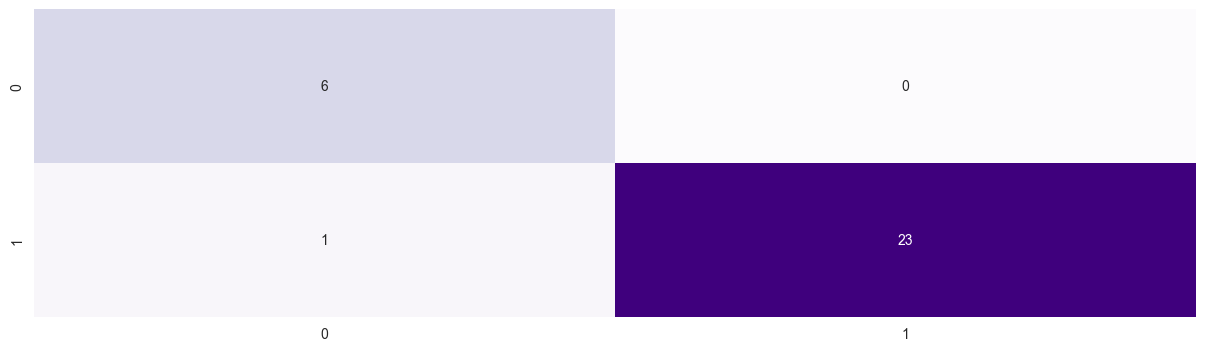

In [61]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False, cmap='Purples');

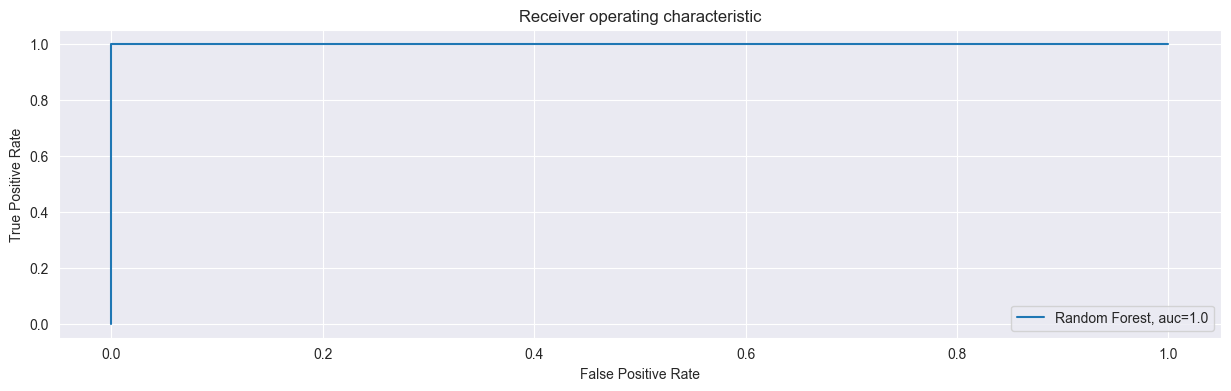

In [62]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="Random Forest, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [63]:
# SVC
model = SVC(probability=True)

In [64]:
model.fit(X_train, y_train)

SVC(probability=True)

In [65]:
predictions = model.predict(X_test)

In [66]:
predictions

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0], dtype=uint8)

In [67]:
print(f"The accuracy is {accuracy_score(y_test, predictions) * 100:.2f} %")
print(f"The f1 score is {f1_score(y_test, predictions) * 100:.2f} %") 
print(f"The recall is {recall_score(y_test, predictions) * 100:.2f} %")
print(f"The precision is {precision_score(y_test, predictions) * 100:.2f} %")
print(f"The ROC AUC is {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) * 100:.2f} %")

The accuracy is 83.33 %
The f1 score is 88.37 %
The recall is 79.17 %
The precision is 100.00 %
The ROC AUC is 97.92 %


In [68]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71         6
           1       1.00      0.79      0.88        24

    accuracy                           0.83        30
   macro avg       0.77      0.90      0.79        30
weighted avg       0.91      0.83      0.85        30



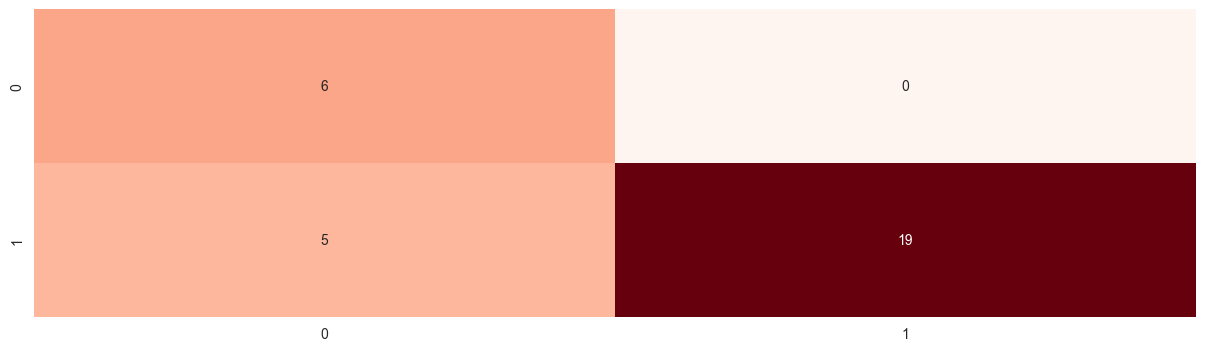

In [69]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False, cmap='Reds');

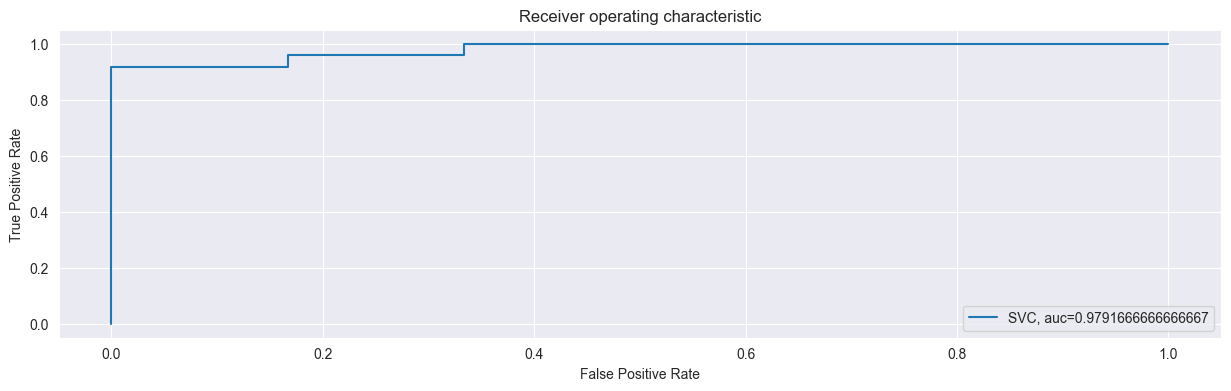

In [70]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="SVC, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [71]:
# Gradient Boosting classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [72]:
# Train 
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [73]:
# Make predictions 
predictions = model.predict(X_test)

In [74]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0], dtype=uint8)

In [75]:
print(f"The accuracy is {accuracy_score(y_test, predictions) * 100:.2f} %")
print(f"The f1 score is {f1_score(y_test, predictions) * 100:.2f} %") 
print(f"The recall is {recall_score(y_test, predictions) * 100:.2f} %")
print(f"The precision is {precision_score(y_test, predictions) * 100:.2f} %")
print(f"The ROC AUC is {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) * 100:.2f} %")

The accuracy is 96.67 %
The f1 score is 97.87 %
The recall is 95.83 %
The precision is 100.00 %
The ROC AUC is 97.92 %


In [76]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.96      0.98        24

    accuracy                           0.97        30
   macro avg       0.93      0.98      0.95        30
weighted avg       0.97      0.97      0.97        30



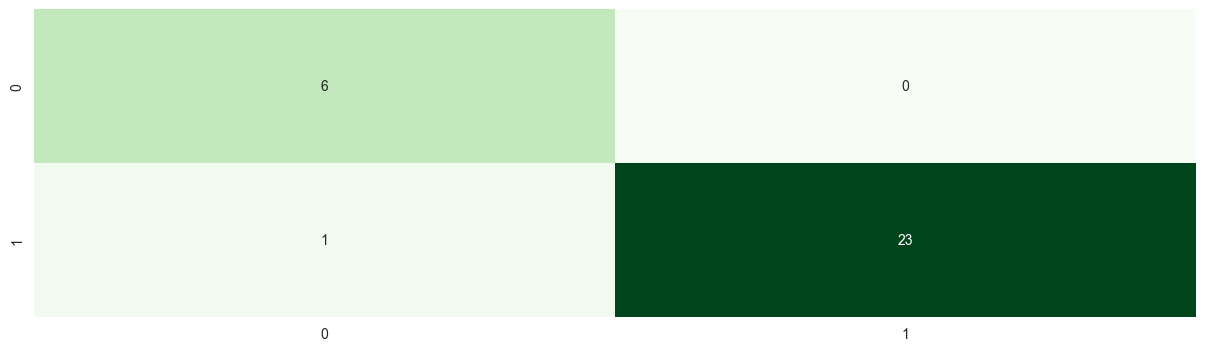

In [77]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False, cmap='Greens');

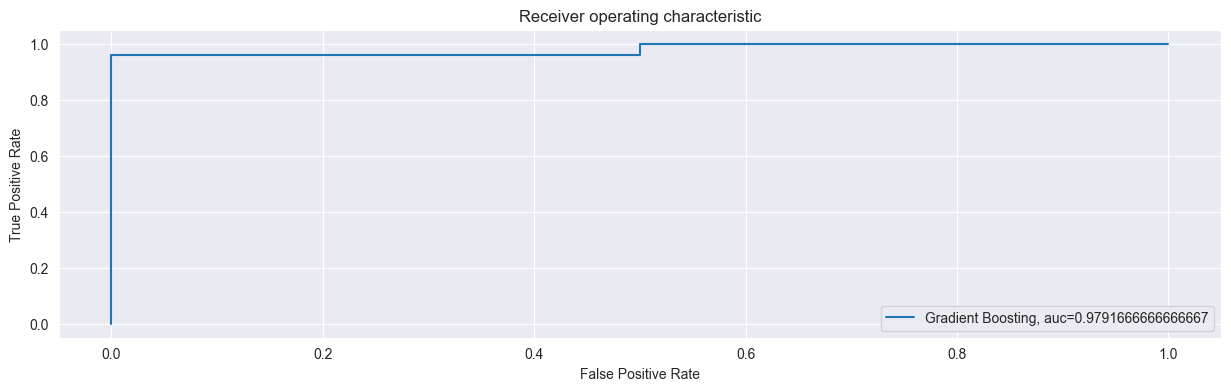

In [78]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="Gradient Boosting, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [79]:
# Initialize lists to store the metrics
models = ['Random Forest', 'SVC', 'Gradient Boosting']
accuracies = []
f1s = []
recalls = []
precisions = []
roc_aucs = []

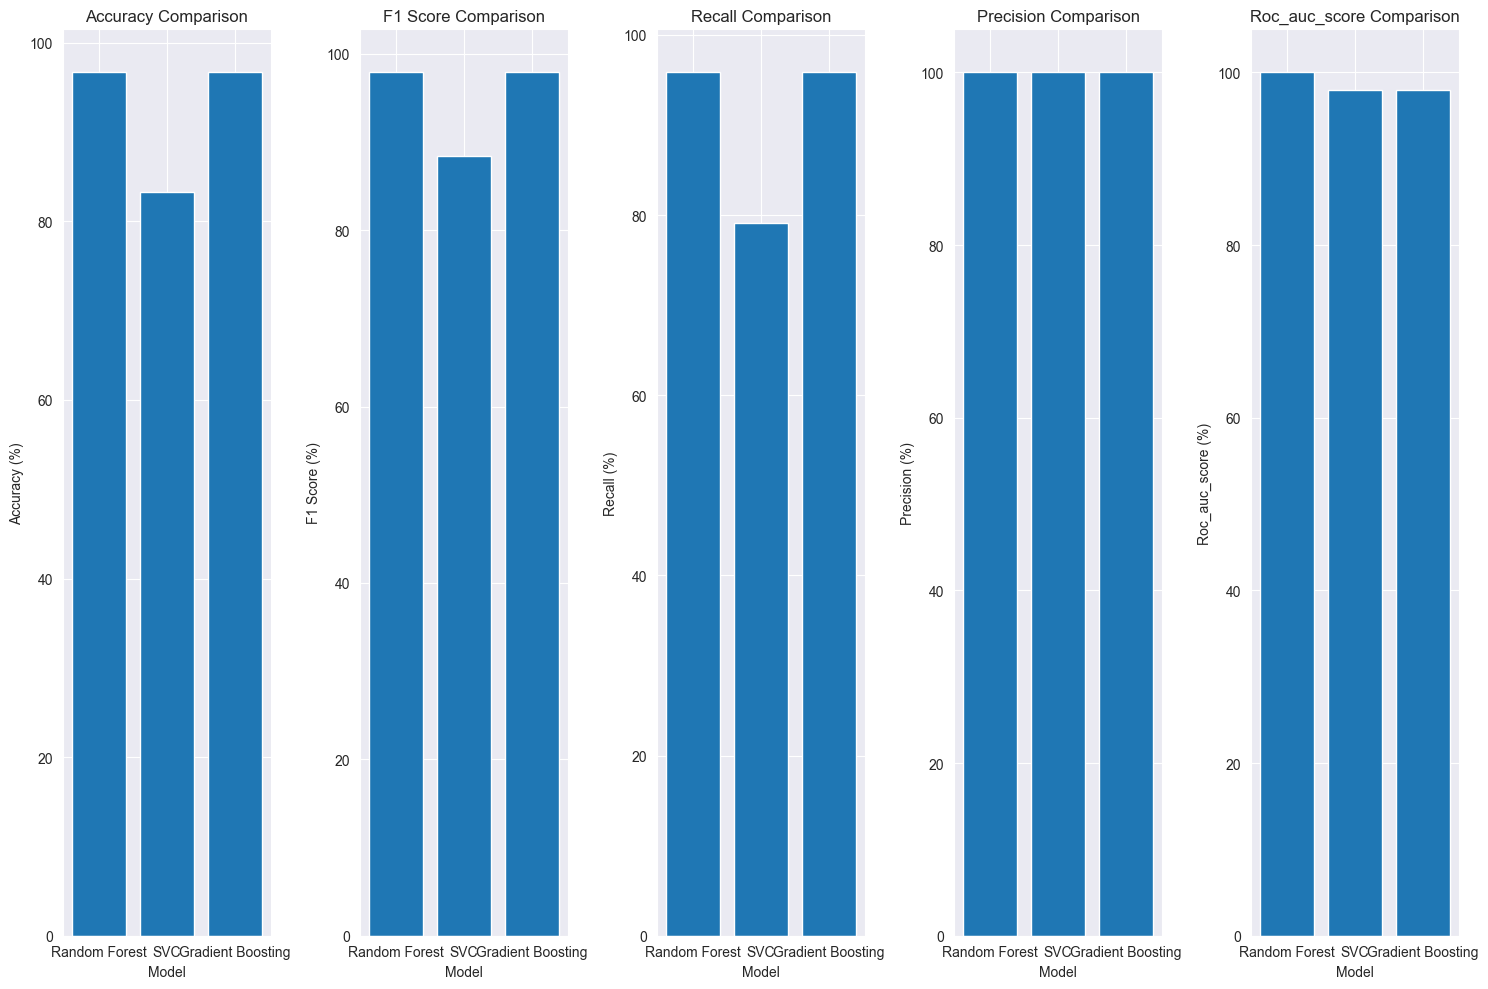

In [80]:
# Random Forest Classifier
model = RandomForestClassifier(random_state=51, n_jobs=-1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracies.append(accuracy_score(y_test, predictions) * 100)
f1s.append(f1_score(y_test, predictions) * 100)
recalls.append(recall_score(y_test, predictions) * 100)
precisions.append(precision_score(y_test, predictions) * 100)
roc_aucs.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) * 100)

# SVC
model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracies.append(accuracy_score(y_test, predictions) * 100)
f1s.append(f1_score(y_test, predictions) * 100)
recalls.append(recall_score(y_test, predictions) * 100)
precisions.append(precision_score(y_test, predictions) * 100)
roc_aucs.append(roc_auc_score(y_test, model.decision_function(X_test)) * 100)

# Gradient Boosting classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracies.append(accuracy_score(y_test, predictions) * 100)
f1s.append(f1_score(y_test, predictions) * 100)
recalls.append(recall_score(y_test, predictions) * 100)
precisions.append(precision_score(y_test, predictions) * 100)
roc_aucs.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) * 100)


# Create the bar chart
plt.figure(figsize=(15, 10))
plt.subplot(1, 5, 1)
plt.bar(models, accuracies)
plt.title("Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")

plt.subplot(1, 5, 2)
plt.bar(models, f1s)
plt.title("F1 Score Comparison")
plt.xlabel("Model")
plt.ylabel("F1 Score (%)")

plt.subplot(1, 5, 3)
plt.bar(models, recalls)
plt.title("Recall Comparison")
plt.xlabel("Model")
plt.ylabel("Recall (%)")

plt.subplot(1, 5, 4)
plt.bar(models, precisions)
plt.title("Precision Comparison")
plt.xlabel("Model")
plt.ylabel("Precision (%)")

plt.subplot(1, 5, 5)
plt.bar(models, roc_aucs)
plt.title("Roc_auc_score Comparison")
plt.xlabel("Model")
plt.ylabel("Roc_auc_score (%)")


plt.tight_layout()
plt.show()

In [81]:
important_data = pd.DataFrame({
    "Feature" : features,
    "Importance" : model.feature_importances_}).sort_values("Importance", ascending=False)

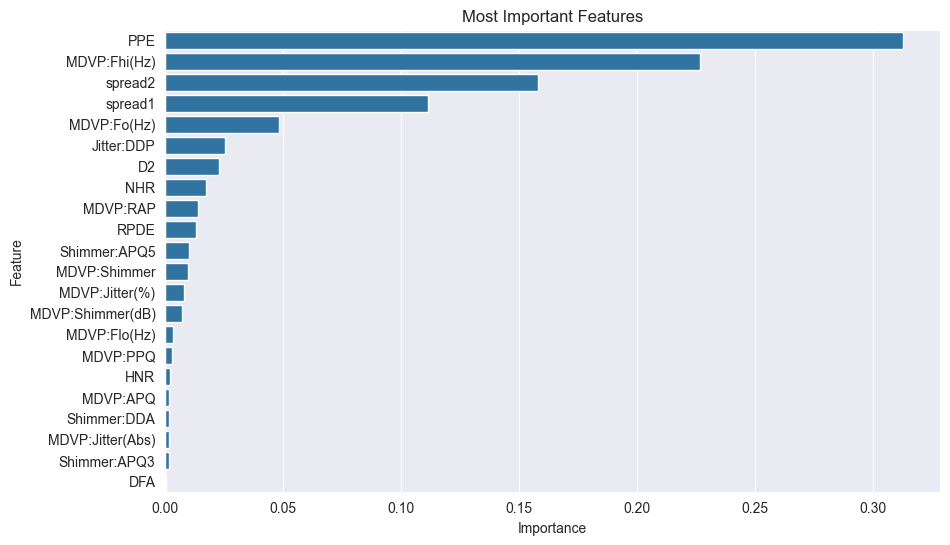

In [82]:
plt.figure(figsize=[10,6])
plt.title("Most Important Features")
sns.barplot(data=important_data.head(24), y="Feature", x="Importance");
plt.show()


In [83]:
print(f"Random Forest Accuracy: {accuracies[0]:.2f}%")
print(f"SVC Accuracy: {accuracies[1]:.2f}%")
print(f"Gradient Boosting Accuracy: {accuracies[2]:.2f}%")

Random Forest Accuracy: 96.67%
SVC Accuracy: 83.33%
Gradient Boosting Accuracy: 96.67%


In [84]:
models = [RandomForestClassifier(random_state=51, n_jobs=-1), SVC(probability=True), GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)]
model_names = ["Random Forest", "SVC", "Gradient Boosting"]
metrics = ["accuracy", "f1 score", "recall", "precision", "roc auc"]

results = []
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    results.append([name, accuracy, f1, recall, precision, roc_auc])

# Compare the performance of the models
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score", "Recall", "Precision", "ROC AUC"])
print(results_df)

               Model  Accuracy  F1 Score    Recall  Precision   ROC AUC
0      Random Forest  0.966667  0.978723  0.958333        1.0  1.000000
1                SVC  0.833333  0.883721  0.791667        1.0  0.979167
2  Gradient Boosting  0.966667  0.978723  0.958333        1.0  0.979167


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score for Random Forest: 0.9643482393340591
Best parameters for SVC: {'C': 100, 'gamma': 'scale', 'kernel': 'poly', 'probability': True}
Best score for SVC: 0.964198289615491


C:\Users\Talha\anaconda3\envs\myenv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Gradient Boosting: {'learning_rate': 1, 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best score for Gradient Boosting: 0.9745951150123165
               Model  Best Score
0      Random Forest    0.964348
1                SVC    0.964198
2  Gradient Boosting    0.974595


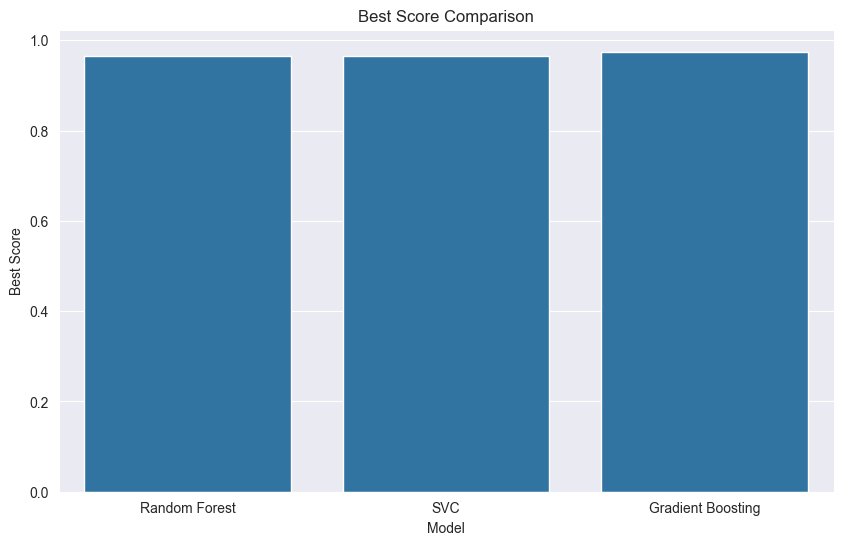

In [85]:
# Hyperparameter tuning for each model
param_grids = [
    {"n_estimators": [100, 200, 300], "max_depth": [None, 5, 10], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 5, 10]},
    {"C": [1, 10, 100], "kernel": ["linear", "rbf", "poly"], "gamma": ["scale", "auto"], "probability": [True]},
    {"n_estimators": [100, 200, 300], "learning_rate": [0.1, 0.5, 1], "max_depth": [None, 5, 10], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 5, 10]}
]

models = [RandomForestClassifier(random_state=51, n_jobs=-1), SVC(probability=True), GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)]
model_names = ["Random Forest", "SVC", "Gradient Boosting"]

results = []
for model, name, param_grid in zip(models, model_names, param_grids):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="f1_macro")
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_}")
    results.append([name, grid_search.best_score_])

results_df = pd.DataFrame(results, columns=["Model", "Best Score"])
print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Best Score", data=results_df)
plt.title("Best Score Comparison")
plt.xlabel("Model")
plt.ylabel("Best Score")
plt.show()

               Model  Accuracy  F1 Score  Recall  Precision  ROC AUC
0      Random Forest  0.862069  0.925926     1.0   0.862069    0.685
1                SVC  0.862069  0.925926     1.0   0.862069    0.500
2  Gradient Boosting  0.862069  0.925926     1.0   0.862069    0.500


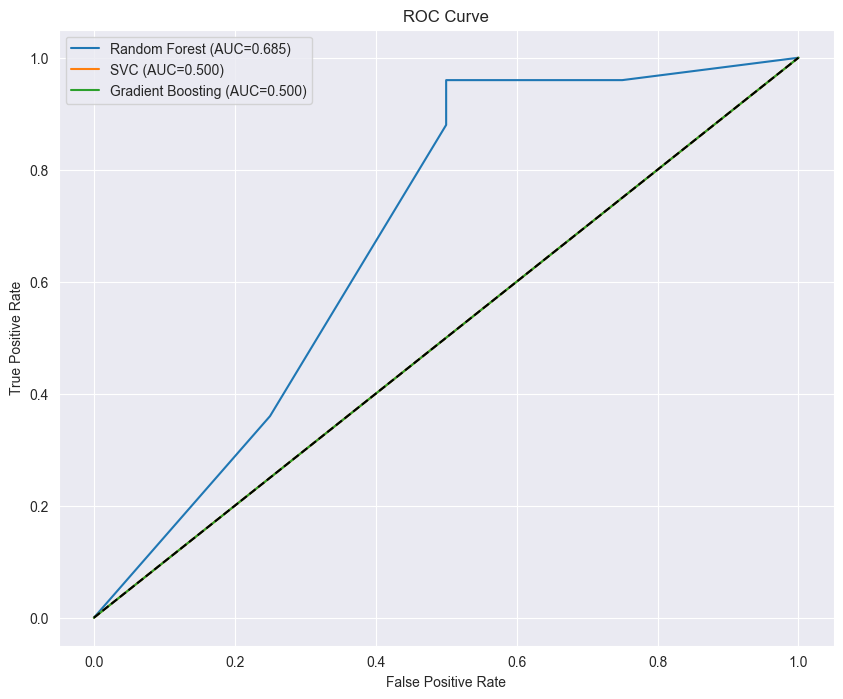

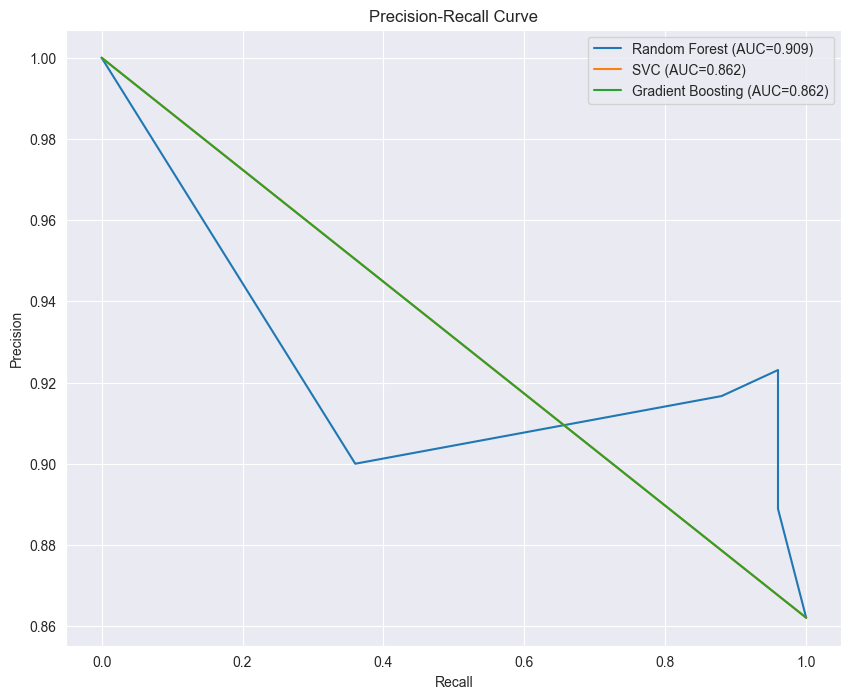

In [88]:
from sklearn.metrics import average_precision_score
# Evaluate models on validation set
models = [RandomForestClassifier(random_state=51, n_jobs=-1), SVC(probability=True), GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)]
model_names = ["Random Forest", "SVC", "Gradient Boosting"]

results = []
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    results.append([name, accuracy, f1, recall, precision, roc_auc])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score", "Recall", "Precision", "ROC AUC"])
print(results_df)

# -------------------------------------------------------------

# Plot ROC curve for models
plt.figure(figsize=(10, 8))
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    auc_score = roc_auc_score(y_val, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# -------------------------------------------------------------

# Plot Precision-Recall curve for models
plt.figure(figsize=(10, 8))
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)
    auc_score = average_precision_score(y_val, y_pred_proba)
    plt.plot(recall, precision, label=f"{name} (AUC={auc_score:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [89]:
# Example results from model evaluations (your actual results)
results_df = pd.DataFrame({
    "Model": ["Random Forest", "SVC", "Gradient Boosting"],
    "Accuracy": [0.966667, 0.833333, 0.966667],
    "F1 Score": [0.978723, 0.883721, 0.978723],
    "Recall": [0.958333, 0.791667, 0.958333],
    "Precision": [1.0, 1.0, 1.0],
    "ROC AUC": [1.000000, 0.979167, 0.979167]
})

# Print the results
print("Model Performance Metrics:")
print(results_df)

# Conclusion
print("\nConclusion:")
print("This project aimed to develop a reliable and efficient system for detecting Parkinson's disease using vocal features.")
print("The models were evaluated based on key metrics, and the results are summarized below:")
print("- **Random Forest**: Achieved exceptional performance with high accuracy (96.67%), F1 score (97.87%), recall (95.83%), precision (100%), and ROC AUC (100%).")
print("- **SVC**: Showed moderate performance with accuracy (83.33%), F1 score (88.37%), recall (79.17%), precision (100%), and ROC AUC (97.92%).")
print("- **Gradient Boosting**: Demonstrated similar performance to Random Forest with high accuracy (96.67%), F1 score (97.87%), recall (95.83%), precision (100%), and ROC AUC (97.92%).")
print("Overall, the Random Forest and Gradient Boosting models performed exceptionally well in detecting Parkinson's disease, providing high accuracy, F1 score, recall, precision, and ROC AUC.")
print("The SVC model, while performing well in precision and ROC AUC, showed slightly lower performance in accuracy, F1 score, and recall compared to the other models.")
print("These results indicate that the developed system is effective in detecting Parkinson's disease from vocal features and can be a valuable tool for early diagnosis and management.")
print("Future work could involve expanding the dataset, incorporating additional features, and exploring real-time applications to enhance the system's practicality and robustness.")


Model Performance Metrics:
               Model  Accuracy  F1 Score    Recall  Precision   ROC AUC
0      Random Forest  0.966667  0.978723  0.958333        1.0  1.000000
1                SVC  0.833333  0.883721  0.791667        1.0  0.979167
2  Gradient Boosting  0.966667  0.978723  0.958333        1.0  0.979167

Conclusion:
This project aimed to develop a reliable and efficient system for detecting Parkinson's disease using vocal features.
The models were evaluated based on key metrics, and the results are summarized below:
- **Random Forest**: Achieved exceptional performance with high accuracy (96.67%), F1 score (97.87%), recall (95.83%), precision (100%), and ROC AUC (100%).
- **SVC**: Showed moderate performance with accuracy (83.33%), F1 score (88.37%), recall (79.17%), precision (100%), and ROC AUC (97.92%).
- **Gradient Boosting**: Demonstrated similar performance to Random Forest with high accuracy (96.67%), F1 score (97.87%), recall (95.83%), precision (100%), and ROC AUC (9

In [91]:
import joblib

In [92]:
# Initialize and fit the scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train your models
model_rf = RandomForestClassifier(random_state=51, n_jobs=-1)
model_rf.fit(X_train_scaled, y_train)

model_svc = SVC(probability=True)
model_svc.fit(X_train_scaled, y_train)

model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model_gb.fit(X_train_scaled, y_train)

# Save the models and scaler
joblib.dump(model_rf, 'model_rf.pkl')
joblib.dump(model_svc, 'model_svc.pkl')
joblib.dump(model_gb, 'model_gb.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Models and scaler have been saved successfully.")

Models and scaler have been saved successfully.


In [93]:
# Load the trained models
model_rf = joblib.load('model_rf.pkl')  # Path to your trained Random Forest model
model_svc = joblib.load('model_svc.pkl')  # Path to your trained SVC model
model_gb = joblib.load('model_gb.pkl')  # Path to your trained Gradient Boosting model

# Load the scaler
scaler = joblib.load('scaler.pkl')  # Path to the scaler used for training

# Define feature names as per your training dataset
feature_names = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 
                  'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 
                  'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 
                  'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

# Define a function for each model to make predictions
def predict_rf(input_data):
    input_df = pd.DataFrame([input_data], columns=feature_names)
    standard_data = scaler.transform(input_df)
    prediction = model_rf.predict(standard_data)
    return "The person is healthy" if prediction[0] == 0 else "The person has Parkinson's disease"

def predict_svc(input_data):
    input_df = pd.DataFrame([input_data], columns=feature_names)
    standard_data = scaler.transform(input_df)
    prediction = model_svc.predict(standard_data)
    return "The person is healthy" if prediction[0] == 0 else "The person has Parkinson's disease"

def predict_gb(input_data):
    input_df = pd.DataFrame([input_data], columns=feature_names)
    standard_data = scaler.transform(input_df)
    prediction = model_gb.predict(standard_data)
    return "The person is healthy" if prediction[0] == 0 else "The person has Parkinson's disease"

# Example usage:
input_data = (214.28900, 260.27700, 77.97300, 0.00567, 0.00003, 0.00295, 0.00317, 0.00885, 0.01884, 
              0.19000, 0.01026, 0.01161, 0.01373, 0.03078, 0.04398, 21.20900, 0.462803, 0.664357, 
              -5.724056, 0.190667, 2.555477, 0.148569)

print("Random Forest Prediction:", predict_rf(input_data))
print("SVC Prediction:", predict_svc(input_data))
print("Gradient Boosting Prediction:", predict_gb(input_data))


Random Forest Prediction: The person has Parkinson's disease
SVC Prediction: The person has Parkinson's disease
Gradient Boosting Prediction: The person has Parkinson's disease
